In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras_preprocessing import image
data = keras.datasets.fashion_mnist


In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation = "softmax")                          
])
#parameters for the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Tested Accuracy:", test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4294 - accuracy: 0.2105
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.1988
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.1984
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3019 - accuracy: 0.2023
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2975 - accuracy: 0.2098
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2981 - accuracy: 0.1787
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2974 - accuracy: 0.1791
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2946 - accuracy: 0.1456
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1098
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 

In [ ]:
model.save("image_model.h5")
#i_model = keras.models.load_model("image_model")

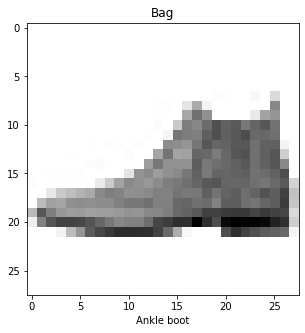

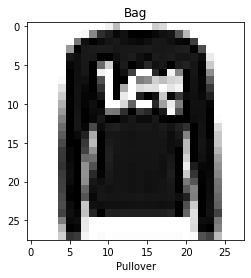

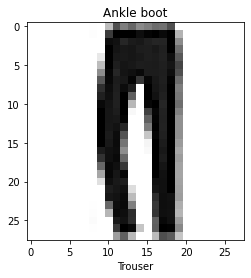

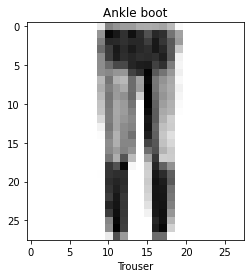

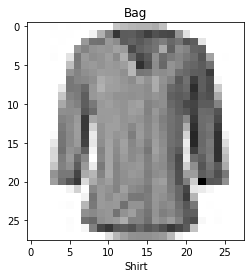

In [ ]:
#making predictions
predictions = model.predict(test_images)

plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()

In [ ]:

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import cv2
import tensorflow as tf

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def print_img(img):
    plt.figure(figsize=(5,5))

    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

def prepare(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    print(new_array.shape)
    print_img(new_array)
    new_array = (np.expand_dims(new_array,0))

    print(f'new_array shape = {new_array.shape}')
    return new_array

    #return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



prediction = model.predict(prepare("shirt.jpg"))
print(prediction)  # will be a list in a list.
'''
for i in range(1, 10):
    if prediction[0][i] == 1:
        answer = prediction[0][i]
        '''


x = np.argmax(prediction[0])
print(class_names[x])


print(type(test_images[0]))
print(test_images[0].shape)